In [222]:
# Import Dependencies
import numpy as np
import pandas as pd
import os

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st

In [223]:
# Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2012-01-01')
# Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2012-01-01')
# Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2012-01-01')

# Grabbing a list of all SECTOR ETFS from https://etfdb.com/etfs/sector/ to keep it Standardized.
# Technology, Healthcare, Energy, Real Estate, Materials, Financials, Industrials, Utilities, Consumer Staples, Consumer Discretionary.
# Are the main 11 Sectors in the US Economy.

# QQQ is already the Technology NASDAQ best fit.
# Import the XLK (Biggest Technology ETF Fund)
XLK = pdr.get_data_yahoo('XLK', start='2012-01-01')
# XLY (Consumer Cyclical/Consumer Discretionary ETF)
XLY = pdr.get_data_yahoo('XLY', start='2012-01-01')
# XLP (Consumer Defensive/Consumer Staples ETF)
XLP = pdr.get_data_yahoo('XLP', start='2012-01-01')
# XLV (Healthcare ETF)
XLV = pdr.get_data_yahoo('XLV', start='2012-01-01')
# XLI (Industrials ETF)
XLI = pdr.get_data_yahoo('XLI', start='2012-01-01')
# XLF (Financials ETF)
XLF = pdr.get_data_yahoo('XLF', start='2012-01-01')
# VNQ (Real Estate ETF)
VNQ = pdr.get_data_yahoo('VNQ', start='2012-01-01')
# XLE (Energy ETF)
XLE = pdr.get_data_yahoo('XLE', start='2012-01-01')
# XLU (Utilities ETF)
XLU = pdr.get_data_yahoo('XLU', start='2012-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [224]:
# Not all Data is equal length. Might want to look for other ETFs to get longer span of Index.
# QQQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\QQQ.csv', index=False)
# SPY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\SPY.csv', index=False)
# VTI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VTI.csv', index=False)
# XLK.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLK.csv', index=False)
# XLC.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLC.csv', index=False)
# XLY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLY.csv', index=False)
# XLP.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLP.csv', index=False)
# XLV.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLV.csv', index=False)
# XLI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLI.csv', index=False)
# XLF.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLF.csv', index=False)
# VNQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VNQ.csv', index=False)
# XLE.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLE.csv', index=False)
# XLU.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLU.csv', index=False)

# folder = 'data'
# if not os.path.exists(folder):
#     os.makedirs(folder)

# files = ['QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
# file_paths = [f'{folder}/{file}.csv' for file in files]

# for file, file_path in zip(files, file_paths):
#     locals()[file].to_csv(file_path, index=True)

In [225]:
# XLV.head()

In [226]:
# Show that that DataFrame SPY imported OK
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,127.760002,128.380005,127.430000,127.500000,103.596199,193697900
2012-01-04 00:00:00-05:00,127.199997,127.809998,126.709999,127.699997,103.758690,127186500
2012-01-05 00:00:00-05:00,127.010002,128.229996,126.430000,128.039993,104.034943,173895000
2012-01-06 00:00:00-05:00,128.199997,128.220001,127.290001,127.709999,103.766800,148050000
2012-01-09 00:00:00-05:00,128.000000,128.179993,127.410004,128.020004,104.018692,99530200


In [227]:
# SPY.tail()

In [228]:
# Show that that DataFrame QQQ imported OK
# QQQ.head()

In [229]:
# QQQ.tail()

In [230]:
# Show that that DataFrame VTI imported OK
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269039,2230400
2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293556,1647400
2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300
2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407921,1640000
2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900


In [231]:
# VTI.tail()

In [232]:
#QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU'

VTI = VTI.reset_index()
QQQ = QQQ.reset_index()
SPY = SPY.reset_index()
XLK = XLK.reset_index()
XLY = XLY.reset_index()
XLP = XLP.reset_index()
XLV = XLV.reset_index()
XLI = XLI.reset_index()
XLF = XLF.reset_index()
VNQ = VNQ.reset_index()
XLE = XLE.reset_index()
XLU = XLU.reset_index()


In [233]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
XLK["Ticker"] = "XLK"
XLY["Ticker"] = "XLY"
XLP["Ticker"] = "XLP"
XLV["Ticker"] = "XLV"
XLI["Ticker"] = "XLI"
XLF["Ticker"] = "XLF"
VNQ["Ticker"] = "VNQ"
XLE["Ticker"] = "XLE"
XLU["Ticker"] = "XLU"

VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269039,2230400,VTI
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293556,1647400,VTI
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300,VTI
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407921,1640000,VTI
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900,VTI


In [234]:
VTI["DayChange"] = int("0")
VTI["CumulativeChange"] = int("0")
QQQ["DayChange"] = int("0")
QQQ["CumulativeChange"] = int("0")
SPY["DayChange"] = int("0")
SPY["CumulativeChange"] = int("0")
XLK["DayChange"] = int("0")
XLK["CumulativeChange"] = int("0")
XLY["DayChange"] = int("0")
XLY["CumulativeChange"] = int("0")
XLP["DayChange"] = int("0")
XLP["CumulativeChange"] = int("0")
XLV["DayChange"] = int("0")
XLV["CumulativeChange"] = int("0")
XLI["DayChange"] = int("0")
XLI["CumulativeChange"] = int("0")
XLF["DayChange"] = int("0")
XLF["CumulativeChange"] = int("0")
VNQ["DayChange"] = int("0")
VNQ["CumulativeChange"] = int("0")
XLE["DayChange"] = int("0")
XLE["CumulativeChange"] = int("0")
XLU["DayChange"] = int("0")
XLU["CumulativeChange"] = int("0")

In [235]:
#checking DTypes
VTI.dtypes

Date                datetime64[ns, America/New_York]
Open                                         float64
High                                         float64
Low                                          float64
Close                                        float64
Adj Close                                    float64
Volume                                         int64
Ticker                                        object
DayChange                                      int64
CumulativeChange                               int64
dtype: object

In [236]:
count = VTI["Open"].count()
print(count)
count.dtype

2793


dtype('int64')

In [237]:
# Run through all tickers to update percent change field
changing = 0
tickers1 = [QQQ, SPY, VTI, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU]
for x in tickers1:
    x["DayChange"] = x.groupby("Ticker").Close.pct_change()*100
    x["CumulativeChange"] = x.groupby("Ticker").DayChange.cumsum()

In [238]:
VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269039,2230400,VTI,NaN,NaN
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293556,1647400,VTI,0.046003,0.046003
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300,VTI,0.444514,0.490517
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407921,1640000,VTI,-0.228905,0.261612
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900,VTI,0.229430,0.491043


In [239]:
VTI.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
2788,2023-02-01 00:00:00-05:00,203.910004,208.320007,202.509995,206.919998,206.919998,4385600,VTI,1.218024,132.311254
2789,2023-02-02 00:00:00-05:00,209.000000,210.880005,208.100006,210.009995,210.009995,3730800,VTI,1.493329,133.804583
2790,2023-02-03 00:00:00-05:00,207.509995,210.179993,207.039993,207.839996,207.839996,2853500,VTI,-1.033283,132.771300
2791,2023-02-06 00:00:00-05:00,206.410004,207.070007,205.500000,206.279999,206.279999,2840200,VTI,-0.750576,132.020723
2792,2023-02-07 00:00:00-05:00,206.000000,206.119995,205.369995,205.429993,205.429993,432283,VTI,-0.412064,131.608659


In [240]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
0,2012-01-03 00:00:00-05:00,56.910000,57.189999,56.750000,56.900002,51.284283,39514100,QQQ,NaN,NaN
1,2012-01-04 00:00:00-05:00,56.810001,57.220001,56.560001,57.139999,51.500580,29403400,QQQ,0.421789,0.421789
2,2012-01-05 00:00:00-05:00,57.020000,57.660000,56.799999,57.610001,51.924206,41260600,QQQ,0.822543,1.244332
3,2012-01-06 00:00:00-05:00,57.619999,57.939999,57.400002,57.810001,52.104465,46325200,QQQ,0.347163,1.591495
4,2012-01-09 00:00:00-05:00,57.959999,57.980000,57.430000,57.619999,51.933224,39195500,QQQ,-0.328667,1.262828


In [241]:
#Check to see if the data merged.
data = pd.concat([SPY, QQQ, VTI, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU])
data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
2229,2020-11-10 00:00:00-05:00,33.680000,34.130001,32.980000,34.130001,30.860134,73338100,XLE,3.236539,-40.267426
1451,2017-10-09 00:00:00-04:00,147.850006,148.009995,147.300003,147.490005,142.198578,13704800,QQQ,-0.115128,101.469127
1284,2017-02-09 00:00:00-05:00,23.389999,23.740000,23.330000,23.709999,21.051245,76813700,XLF,1.368105,85.127170
2325,2021-03-31 00:00:00-04:00,99.000000,99.260002,98.120003,98.449997,95.790398,12291300,XLI,-0.323985,122.066875
957,2015-10-22 00:00:00-04:00,78.699997,79.389999,78.550003,79.239998,72.692619,8227500,XLY,1.316966,73.766335
2123,2020-06-11 00:00:00-04:00,126.769997,128.660004,123.809998,124.110001,121.525841,6867600,XLY,-5.237841,128.029903
1392,2017-07-17 00:00:00-04:00,54.820000,54.840000,54.619999,54.779999,47.218822,7902200,XLP,0.109645,55.747200
1648,2018-07-23 00:00:00-04:00,75.099998,75.150002,74.430000,74.559998,59.048531,7623800,XLE,-0.440649,17.379450
2103,2020-05-13 00:00:00-04:00,37.180000,37.230000,35.470001,35.730000,31.381517,34497400,XLE,-4.541813,-40.919452
437,2013-09-30 00:00:00-04:00,60.230000,60.779999,60.169998,60.630001,54.079369,5381600,XLY,-0.377916,44.825399


In [242]:
# Test of how to get daily percent change
# data['Change %'] = data.groupby('Ticker').Close.pct_change()

In [243]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

12


In [244]:
data.value_counts

<bound method DataFrame.value_counts of                           Date        Open        High         Low  \
0    2012-01-03 00:00:00-05:00  127.760002  128.380005  127.430000   
1    2012-01-04 00:00:00-05:00  127.199997  127.809998  126.709999   
2    2012-01-05 00:00:00-05:00  127.010002  128.229996  126.430000   
3    2012-01-06 00:00:00-05:00  128.199997  128.220001  127.290001   
4    2012-01-09 00:00:00-05:00  128.000000  128.179993  127.410004   
...                        ...         ...         ...         ...   
2788 2023-02-01 00:00:00-05:00   68.760002   69.699997   68.269997   
2789 2023-02-02 00:00:00-05:00   69.250000   70.129997   68.709999   
2790 2023-02-03 00:00:00-05:00   68.739998   69.010002   67.000000   
2791 2023-02-06 00:00:00-05:00   67.660004   68.550003   67.540001   
2792 2023-02-07 00:00:00-05:00   68.180000   68.232803   67.570000   

           Close   Adj Close     Volume Ticker  DayChange  CumulativeChange  
0     127.500000  103.596199  193697900  

In [245]:
#Describe the Data to see what pops out if anything.
data.describe()

,Open,High,Low,Close,Adj Close,Volume,DayChange,CumulativeChange
count,33511.000000,33511.000000,33511.000000,33511.000000,33511.000000,3.351100e+04,33499.000000,33499.000000
mean,97.635559,98.261520,96.952951,97.646561,89.468981,2.395451e+07,0.045850,68.505882
std,77.075552,77.580933,76.507681,77.080908,76.257557,3.329478e+07,1.250397,48.290593
min,10.706742,10.844842,10.658002,10.804224,8.771101,4.322830e+05,-20.141180,-86.914252
25%,51.720001,52.055000,51.400002,51.730000,43.760719,5.687450e+06,-0.484513,33.169444
50%,74.000000,74.480003,73.419998,73.980003,64.044304,1.074200e+07,0.076199,61.004757
75%,110.764999,111.310001,110.110001,110.775002,104.956249,2.639735e+07,0.637603,97.302052
max,479.220001,479.980011,476.059998,477.709991,470.083649,5.072443e+08,16.037339,214.274135


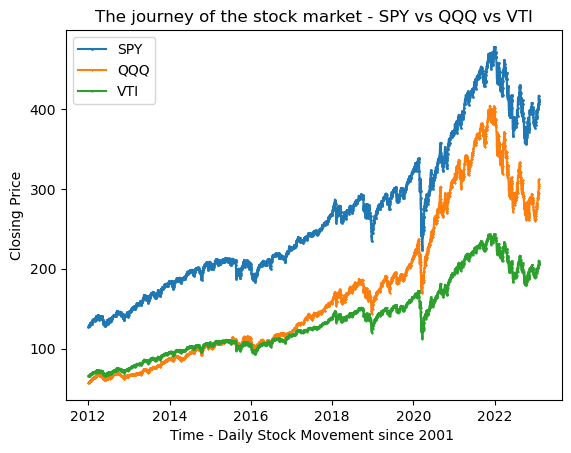

In [246]:
#Plot out the initial info we have to see what we are working with.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["Close"], marker = 'x', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["Close"], marker = 'v', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

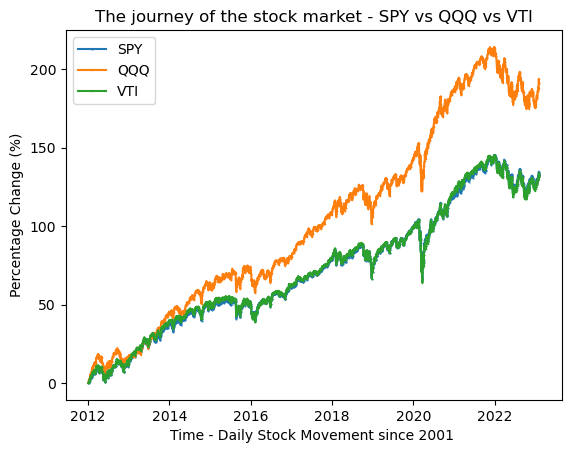

In [247]:
#Plot out the new Cumulative change we calcuated into a Graph that starts at the same point.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["CumulativeChange"], marker = 'o', markersize=0.5)
plt.plot(QQQ_line["Date"], QQQ_line["CumulativeChange"], marker = 'x', markersize=0.5)
plt.plot(VTI_line["Date"], VTI_line["CumulativeChange"], marker = 'v', markersize=0.5)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

The takeaway from merging the graphs by cumulative change is that we noticed that VTI and SPY both track almost the identical stocks since the lines are identical to one another.

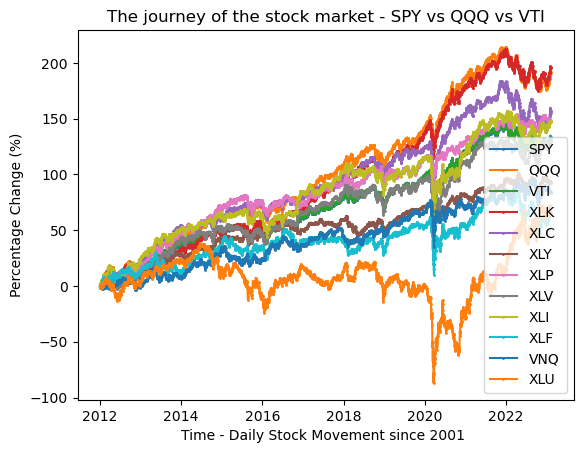

In [248]:
# Starting graphing cumulative change line for all ETFs by different sectors since 2012/01/01
# SPY, QQQ, VTI, XLK, XLC, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
XLK_line = data.loc[data["Ticker"] == "XLK"]
XLY_line = data.loc[data["Ticker"] == "XLY"]
XLP_line = data.loc[data["Ticker"] == "XLP"]
XLV_line = data.loc[data["Ticker"] == "XLV"]
XLI_line = data.loc[data["Ticker"] == "XLI"]
XLF_line = data.loc[data["Ticker"] == "XLF"]
VNQ_line = data.loc[data["Ticker"] == "VNQ"]
XLU_line = data.loc[data["Ticker"] == "XLU"]
XLE_line = data.loc[data["Ticker"] == "XLE"]
plt.plot(SPY_line["Date"], SPY_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLK_line["Date"], XLK_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLY_line["Date"], XLY_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLP_line["Date"], XLP_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLV_line["Date"], XLV_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLI_line["Date"], XLI_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLF_line["Date"], XLF_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(VNQ_line["Date"], VNQ_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLU_line["Date"], XLU_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLE_line["Date"], XLE_line["CumulativeChange"], marker = 'o', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI", "XLK", "XLC", "XLY" ,"XLP", "XLV", "XLI", "XLF", "VNQ", "XLU", "XLE"], loc="best")
plt.show()

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33511 entries, 0 to 2792
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                           
---  ------            --------------  -----                           
 0   Date              33511 non-null  datetime64[ns, America/New_York]
 1   Open              33511 non-null  float64                         
 2   High              33511 non-null  float64                         
 3   Low               33511 non-null  float64                         
 4   Close             33511 non-null  float64                         
 5   Adj Close         33511 non-null  float64                         
 6   Volume            33511 non-null  int64                           
 7   Ticker            33511 non-null  object                          
 8   DayChange         33499 non-null  float64                         
 9   CumulativeChange  33499 non-null  float64                         
dtypes: datetime64[ns, Ameri

In [250]:
#Seems like we have all of the data points matching one another meaning that our initial 3 ETFs representing the Stock Market, DOW, NASDAQ and S&P500 are most likely in line with one another.
data.count()

Date                33511
Open                33511
High                33511
Low                 33511
Close               33511
Adj Close           33511
Volume              33511
Ticker              33511
DayChange           33499
CumulativeChange    33499
dtype: int64

In [251]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ    111171779800
SPY    281112043658
VNQ     12464993900
VTI      8600228483
XLE     54213927025
XLF    162892800964
XLI     32627851900
XLK     28716607900
XLP     31041422636
XLU     38122417078
XLV     25934500800
XLY     15840860057
Name: Volume, dtype: int64

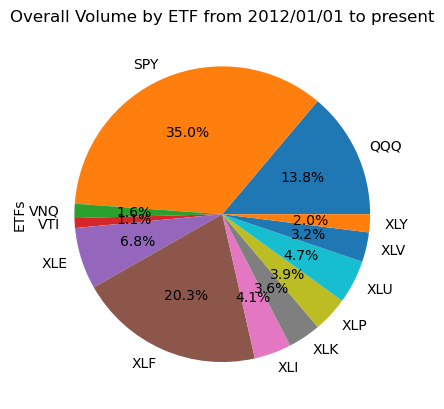

In [252]:
label = count1.index.values
plt.pie(count1, labels=label, autopct="%1.1f%%", startangle=0, shadow=False)
plt.title("Overall Volume by ETF from 2012/01/01 to present")
plt.ylabel("ETFs")
plt.show()